# Problem Statement


### A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. The product being sold is a term deposit (Fixed Deposit). The classification goal is to predict if the client will subscribe a term deposit (variable y).(By Aadi Deshpande)

# Introduction

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(' train dataset dimensions: ', train.shape)
print(' test dataset dimensions : ', test.shape)

 train dataset dimensions:  (32978, 22)
 test dataset dimensions :  (8210, 21)


In [4]:
train.head(5)

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
test.head(5)

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [6]:
train.shape

(32978, 22)

In [7]:
train.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
test.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

# Exploratory Data Analysis

In [9]:
train.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,20620.844533,40.042392,258.808145,2.563376,961.752471,0.174480,0.079562,93.574961,-40.508163,3.618474,5166.942198
std,11878.692749,10.466038,259.565427,2.770355,188.683048,0.497501,1.571342,0.579191,4.633056,1.735421,72.341606
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10346.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20649.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30887.750000,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### We will convert categorical string type data to numerical data. 

In [10]:
train['y'].replace(('yes','no'),(1,0),inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3699134780>,
      dtype=object)

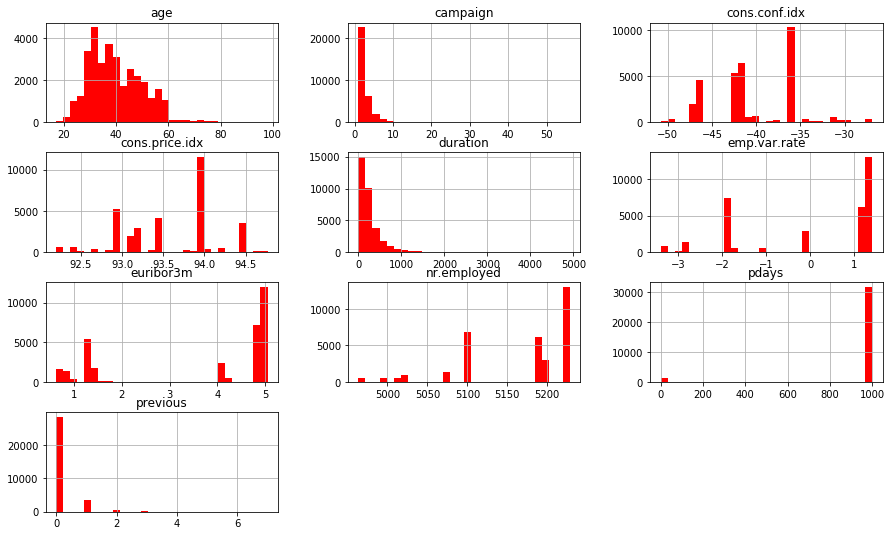

In [11]:
nums = ['age','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
train[nums].hist(bins=30, figsize=(15, 9) ,color = "red")


1. Majority age is between 20 and 60.
2. Majority campaign is always less than 10.
3. Most of the clients have never been contacted before.

In [12]:
new_contact = pd.get_dummies(train['contact'],drop_first=True)
train = pd.concat([train,new_contact],axis = 1)
train.drop(['contact'],inplace=True,axis=1)

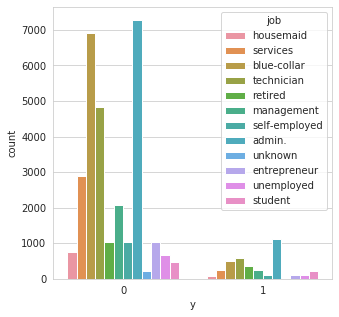

In [13]:
sns.set_style("whitegrid")
#plt.figure(figsize=(30,20))
plt.rcParams['figure.figsize'] = [5, 5]

sns.countplot(x='y',data=train,hue="job")


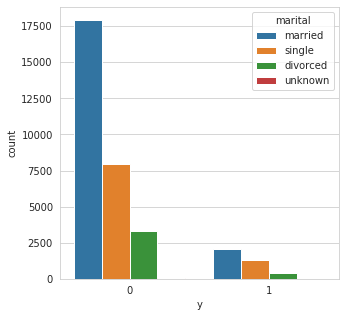

In [14]:
sns.countplot(x='y',data=train,hue="marital")


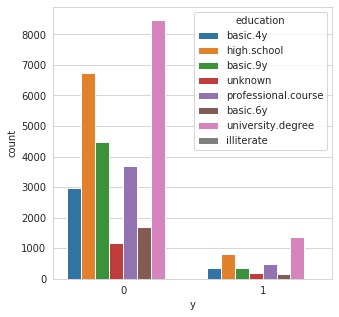

In [15]:
sns.countplot(x='y',data=train,hue="education")



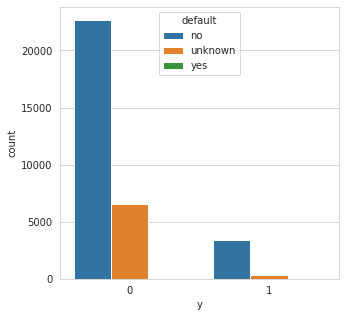

In [16]:
sns.countplot(x='y',data=train,hue="default")


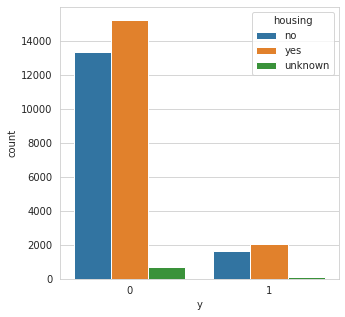

In [17]:
sns.countplot(x='y',data=train,hue="housing")


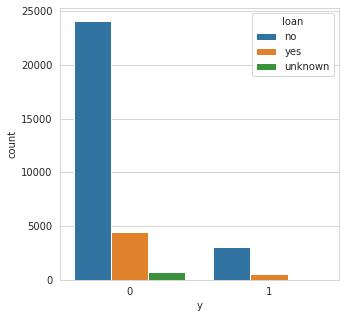

In [18]:
sns.countplot(x='y',data=train,hue="loan")



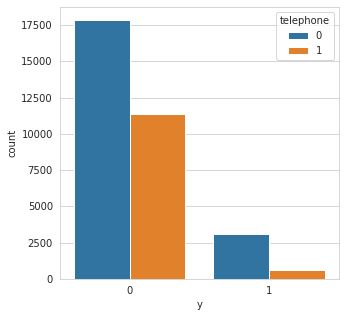

In [19]:
sns.countplot(x='y',data=train,hue="telephone")


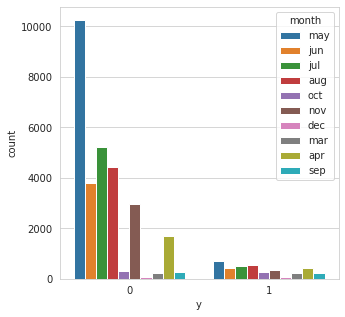

In [20]:
sns.countplot(x='y',data=train,hue="month")


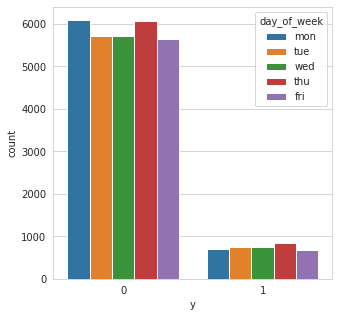

In [21]:
sns.countplot(x='y',data=train,hue="day_of_week")

### ['default'] has unknown values that cannot be ignored

In [22]:
train['day_of_week'].value_counts()


thu    6918
mon    6788
tue    6478
wed    6469
fri    6325
Name: day_of_week, dtype: int64

In [23]:
train['day_of_week'] = train['day_of_week'].map({'thu':5 ,'mon': 2,'tue':3,'wed':4,'fri':6})

In [24]:
train['month'].value_counts()


may    10951
jul     5745
aug     4953
jun     4257
nov     3285
apr     2147
oct      580
sep      462
mar      447
dec      151
Name: month, dtype: int64

In [25]:

            
train['month'] = train['month'].map({'may': 5,'jul': 7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12})

In [26]:
train.head()

,id,age,job,marital,education,default,housing,loan,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,telephone
0,0,56,housemaid,married,basic.4y,no,no,no,5,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,1,57,services,married,high.school,unknown,no,no,5,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,2,37,services,married,high.school,no,yes,no,5,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,4,56,services,married,high.school,no,no,yes,5,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,5,45,services,married,basic.9y,unknown,no,no,5,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [27]:
train['job'].value_counts()


admin.           8384
blue-collar      7416
technician       5434
services         3154
management       2334
retired          1392
entrepreneur     1151
self-employed    1139
housemaid         835
unemployed        789
student           692
unknown           258
Name: job, dtype: int64

In [28]:
train['job'] = train['job'].map({'admin.': 1,'blue-collar': 1,'technician': 1,'services': 1,'management': 1,'retired': 1,'entrepreneur': 1, 'self-employed': 1,'housemaid': 1,'student': 0,'unemployed': 0,'unknown': 1})

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null int64
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
month             32978 non-null int64
day_of_week       32978 non-null int64
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null int64
telephone         32978 non-null uint8
dtypes: float64(5

In [30]:
train['job'].value_counts()

1    31497
0     1481
Name: job, dtype: int64

In [31]:
train['marital'].value_counts()

married     19972
single       9249
divorced     3694
unknown        63
Name: marital, dtype: int64

In [32]:
train['marital'] = train['marital'].map({'married': 1,'unknown': 0,'single':0,'divorced':0})

In [33]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null int64
marital           32978 non-null int64
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
month             32978 non-null int64
day_of_week       32978 non-null int64
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null int64
telephone         32978 non-null uint8
dtypes: float64(5)

In [34]:
train['education'].value_counts()

university.degree      9827
high.school            7544
basic.9y               4862
professional.course    4180
basic.4y               3322
basic.6y               1845
unknown                1383
illiterate               15
Name: education, dtype: int64

In [35]:
train['education'] = train['education'].map({'university.degree': 1,'high.school': 0.8,'basic.9y':0.6,'professional.course':0.8,'basic.6y':0.4,'basic.4y':0.2,'unknown':0.8,'illiterate':0})

In [36]:
train['education'].value_counts()           


0.8    13107
1.0     9827
0.6     4862
0.2     3322
0.4     1845
0.0       15
Name: education, dtype: int64

In [37]:
train['default'].value_counts()

no         26043
unknown     6932
yes            3
Name: default, dtype: int64

In [38]:
train.drop('default',axis = 1, inplace=True)

In [39]:
train['housing'].value_counts()

yes        17252
no         14937
unknown      789
Name: housing, dtype: int64

In [40]:
train['housing'] = train['housing'].map({'yes':1,'no':0,'unknown':1})


In [41]:
train['housing'].value_counts()

1    18041
0    14937
Name: housing, dtype: int64

In [42]:
train['loan'].value_counts()

no         27174
yes         5015
unknown      789
Name: loan, dtype: int64

In [43]:
train['loan'] = train['loan'].map({'yes':1,'no':0,'unknown':0})


In [44]:
train['poutcome'].value_counts()

nonexistent    28443
failure         3415
success         1120
Name: poutcome, dtype: int64

In [45]:
train['poutcome'] = train['poutcome'].map({'nonexistent':0,'failure':-1,'success':1})
           

In [46]:
train['poutcome'].value_counts()

 0    28443
-1     3415
 1     1120
Name: poutcome, dtype: int64

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 21 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null int64
marital           32978 non-null int64
education         32978 non-null float64
housing           32978 non-null int64
loan              32978 non-null int64
month             32978 non-null int64
day_of_week       32978 non-null int64
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null int64
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null int64
telephone         32978 non-null uint8
dtypes: float64(6), int64(14), uint8(1)
memory usage: 5.1 MB

<Figure size 2160x1440 with 0 Axes>

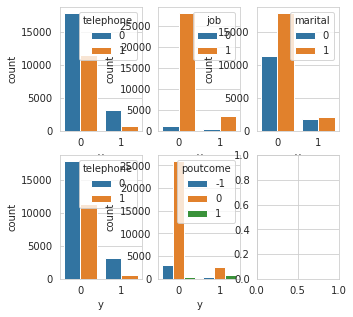

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(30,20))

fig, ax =plt.subplots(2,3)
plt.rcParams['figure.figsize'] = [15, 15]
sns.countplot(x='y',data=train,hue="telephone",ax=ax[0,0])
sns.countplot(x='y',data=train,hue="job",ax=ax[0,1])
sns.countplot(x='y',data=train,hue="marital",ax=ax[0,2])

sns.countplot(x='y',data=train,hue="telephone",ax=ax[1,0])
sns.countplot(x='y',data=train,hue="poutcome",ax=ax[1,1])

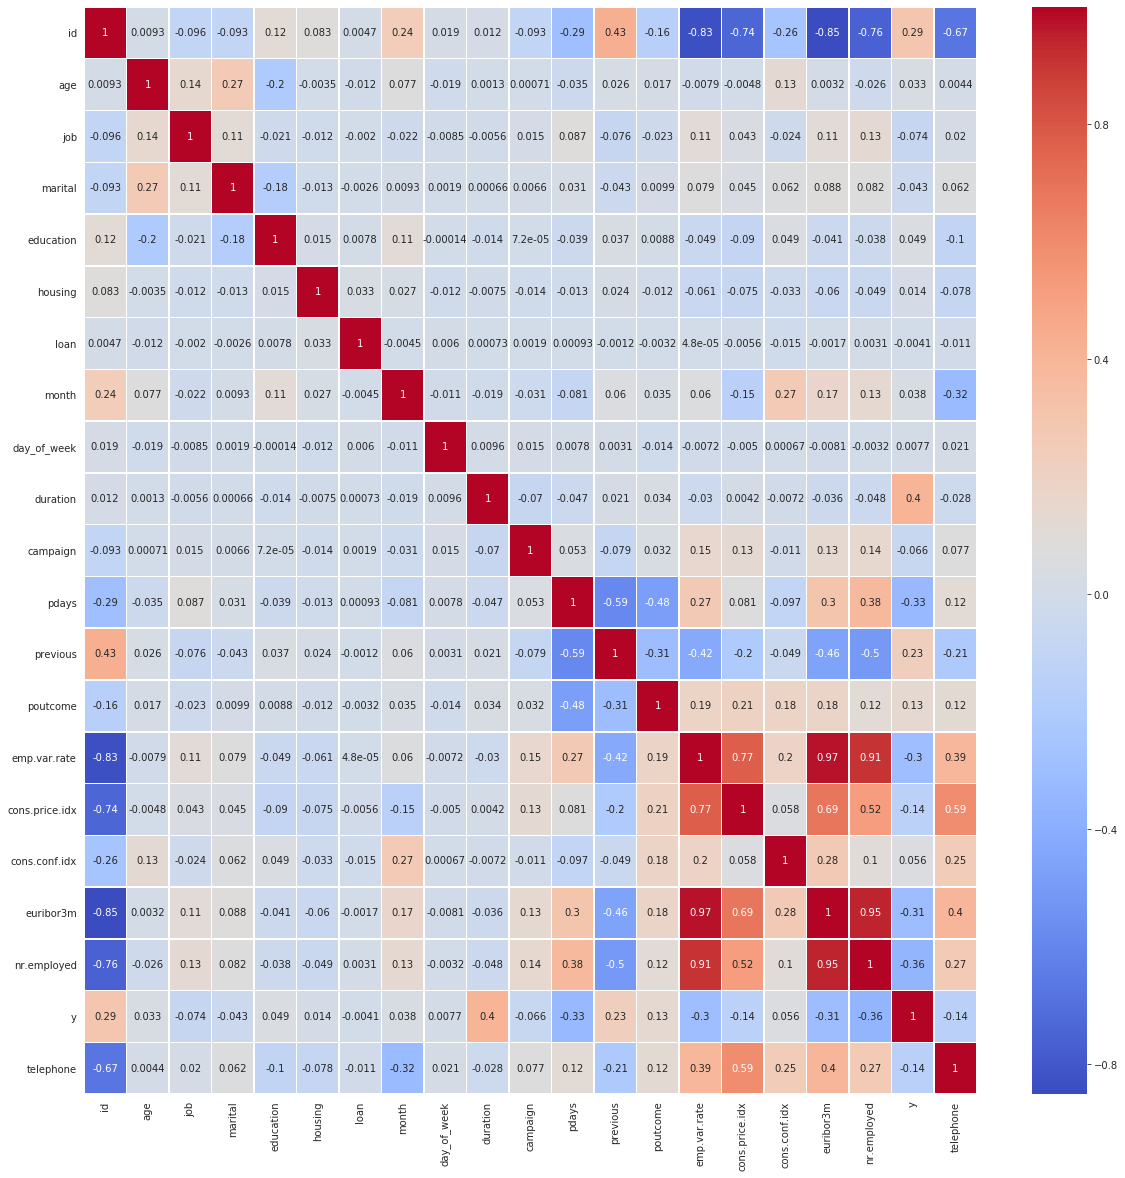

In [49]:
plt.rcParams['figure.figsize'] = [20, 20]
sns.heatmap(train.corr(),annot=True, cmap='coolwarm', linewidth = .5)


In [50]:
train.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
housing           0
loan              0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
telephone         0
dtype: int64

In [51]:
#train.drop('loan',axis = 1, inplace=True)

In [52]:
#train.drop('education',axis = 1, inplace=True)

In [53]:
#train.drop('age',axis = 1, inplace=True)

In [54]:
#train.drop('housing',axis = 1, inplace=True)

In [55]:
#train.drop('duration',axis = 1, inplace=True)

In [56]:
#train.drop('previous',axis = 1, inplace=True)

In [57]:
#train.drop('marital',axis = 1, inplace=True)

In [58]:
#train.drop('pdays',axis = 1, inplace=True)

In [59]:
train.drop('day_of_week',axis = 1, inplace=True)

In [60]:
train.drop('month',axis = 1, inplace=True)

# Do the same for Test set also

In [61]:
new_contact = pd.get_dummies(test['contact'],drop_first=True)
test = pd.concat([test,new_contact],axis = 1)
test.drop(['contact'],inplace=True,axis=1)

In [62]:
test['day_of_week'].value_counts()

mon    1726
thu    1705
wed    1665
tue    1612
fri    1502
Name: day_of_week, dtype: int64

In [63]:
test['day_of_week'] = test['day_of_week'].map({'thu':5 ,'mon': 2,'tue':3,'wed':4,'fri':6})

In [64]:
test['month'].value_counts()


may    2818
jul    1429
aug    1225
jun    1061
nov     816
apr     485
oct     138
sep     108
mar      99
dec      31
Name: month, dtype: int64

In [65]:
test['month'] = test['month'].map({'may': 5,'jul': 7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12})

In [66]:
test['job'].value_counts()

admin.           2038
blue-collar      1838
technician       1309
services          815
management        590
retired           328
entrepreneur      305
self-employed     282
housemaid         225
unemployed        225
student           183
unknown            72
Name: job, dtype: int64

In [67]:
test['job'] = test['job'].map({'admin.': 1,'blue-collar': 1,'technician': 1,'services': 1,'management': 1,'retired': 1,'entrepreneur': 1, 'self-employed': 1,'housemaid': 1,'student': 0,'unemployed': 0,'unknown': 0})

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 21 columns):
id                8210 non-null int64
age               8210 non-null int64
job               8210 non-null int64
marital           8210 non-null object
education         8210 non-null object
default           8210 non-null object
housing           8210 non-null object
loan              8210 non-null object
month             8210 non-null int64
day_of_week       8210 non-null int64
duration          8210 non-null int64
campaign          8210 non-null int64
pdays             8210 non-null int64
previous          8210 non-null int64
poutcome          8210 non-null object
emp.var.rate      8210 non-null float64
cons.price.idx    8210 non-null float64
cons.conf.idx     8210 non-null float64
euribor3m         8210 non-null float64
nr.employed       8210 non-null float64
telephone         8210 non-null uint8
dtypes: float64(5), int64(9), object(6), uint8(1)
memory usage: 1.3+ MB


In [69]:
test['marital'].value_counts()

married     4956
single      2319
divorced     918
unknown       17
Name: marital, dtype: int64

In [70]:
test['marital'] = test['marital'].map({'married': 1,'unknown': 1,'single':0,'divorced':0})

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 21 columns):
id                8210 non-null int64
age               8210 non-null int64
job               8210 non-null int64
marital           8210 non-null int64
education         8210 non-null object
default           8210 non-null object
housing           8210 non-null object
loan              8210 non-null object
month             8210 non-null int64
day_of_week       8210 non-null int64
duration          8210 non-null int64
campaign          8210 non-null int64
pdays             8210 non-null int64
previous          8210 non-null int64
poutcome          8210 non-null object
emp.var.rate      8210 non-null float64
cons.price.idx    8210 non-null float64
cons.conf.idx     8210 non-null float64
euribor3m         8210 non-null float64
nr.employed       8210 non-null float64
telephone         8210 non-null uint8
dtypes: float64(5), int64(10), object(5), uint8(1)
memory usage: 1.3+ MB


In [72]:
test['education'].value_counts()

university.degree      2341
high.school            1971
basic.9y               1183
professional.course    1063
basic.4y                854
basic.6y                447
unknown                 348
illiterate                3
Name: education, dtype: int64

In [73]:
test['education'] = test['education'].map({'university.degree': 1,'high.school': 0.8,'basic.9y':0.6,'professional.course':0.8,'basic.6y':0.4,'basic.4y':0.2,'unknown':0,'illiterate':0})            


In [74]:
test['default'].value_counts()

no         6545
unknown    1665
Name: default, dtype: int64

In [75]:
test.drop('default',axis = 1, inplace=True)

In [76]:
test['housing'].value_counts()

yes        4324
no         3685
unknown     201
Name: housing, dtype: int64

In [77]:
test['housing'] = test['housing'].map({'yes':1,'no':0,'unknown':0})


In [78]:
test['loan'].value_counts()

no         6776
yes        1233
unknown     201
Name: loan, dtype: int64

In [79]:
test['loan'] = test['loan'].map({'yes':1,'no':0,'unknown':0})


In [80]:
test['poutcome'].value_counts()

nonexistent    7120
failure         837
success         253
Name: poutcome, dtype: int64

In [81]:
test['poutcome'] = test['poutcome'].map({'nonexistent':0,'failure':-1,'success':1})
 

In [82]:
#test.drop('age',axis = 1, inplace=True)

In [83]:
#test.drop('housing',axis = 1, inplace=True)

In [84]:
#test.drop('education',axis = 1, inplace=True)

In [85]:
#test.drop('job',axis = 1, inplace=True)

In [86]:
#test.drop('duration',axis = 1, inplace=True)

In [87]:
#test.drop('marital',axis = 1, inplace=True)

In [88]:
test.drop('day_of_week',axis = 1, inplace=True)

In [89]:
test.drop('month',axis = 1, inplace=True)

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 18 columns):
id                8210 non-null int64
age               8210 non-null int64
job               8210 non-null int64
marital           8210 non-null int64
education         8210 non-null float64
housing           8210 non-null int64
loan              8210 non-null int64
duration          8210 non-null int64
campaign          8210 non-null int64
pdays             8210 non-null int64
previous          8210 non-null int64
poutcome          8210 non-null int64
emp.var.rate      8210 non-null float64
cons.price.idx    8210 non-null float64
cons.conf.idx     8210 non-null float64
euribor3m         8210 non-null float64
nr.employed       8210 non-null float64
telephone         8210 non-null uint8
dtypes: float64(6), int64(11), uint8(1)
memory usage: 1.1 MB


# Training and Testing

In [91]:
X = train.drop(['y','id'],axis=1)
y = train['y']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

## Use Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr = LogisticRegression()

In [96]:
lr.fit(X_train,y_train)

/home/aadi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_lr = lr.predict(X_test)

## Using Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
nb = GaussianNB()

In [100]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
y_nb = nb.predict(X_test)

## Using Stochastic Gradient Descent

In [102]:
from sklearn.linear_model import SGDClassifier

In [103]:
sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [104]:
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
y_sgd = sgd.predict(X_test)

## Using Support Vector Machines

In [106]:
from sklearn.svm import SVC

In [107]:
svm = SVC(kernel="linear",random_state=101)

In [108]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=101,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
y_svm = svm.predict(X_test)

## Let us compare the classification reports of the models

In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8758
           1       0.66      0.40      0.50      1136

    accuracy                           0.91      9894
   macro avg       0.79      0.69      0.72      9894
weighted avg       0.90      0.91      0.90      9894



In [112]:
print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      8758
           1       0.37      0.59      0.45      1136

    accuracy                           0.84      9894
   macro avg       0.65      0.73      0.68      9894
weighted avg       0.88      0.84      0.85      9894



In [113]:
print(classification_report(y_test,y_sgd))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8758
           1       0.69      0.06      0.11      1136

    accuracy                           0.89      9894
   macro avg       0.79      0.53      0.52      9894
weighted avg       0.87      0.89      0.84      9894



In [114]:
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8758
           1       0.65      0.37      0.47      1136

    accuracy                           0.90      9894
   macro avg       0.79      0.67      0.71      9894
weighted avg       0.89      0.90      0.89      9894



In [115]:
p1 = pd.DataFrame(y_lr)

## Hence, Logistic Regression is the best model

In [116]:
X = train.drop(['y','id'],axis=1)
y = train['y']
X_test = test

In [117]:
X_test = test.drop('id',axis=1)

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logmodel = LogisticRegression()

In [120]:
logmodel.fit(X,y)

/home/aadi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
predictions = logmodel.predict(X_test)

In [122]:
predictions


array([0, 0, 0, ..., 0, 0, 1])

In [123]:
p1 = pd.DataFrame(predictions)

In [124]:
p1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [125]:
final = pd.DataFrame(test['id'])

In [126]:
final.head()

,id
0,3
1,6
2,10
3,11
4,13


In [127]:
final = pd.concat([final,p1],axis=1)

In [128]:
final.head()

,id,0
0,3,0
1,6,0
2,10,0
3,11,0
4,13,0


In [129]:
final.columns = ['id', 'y']

In [130]:
final.head()

,id,y
0,3,0
1,6,0
2,10,0
3,11,0
4,13,0


In [131]:
final['y'].value_counts()

0    7695
1     515
Name: y, dtype: int64

In [132]:
final['y'] = final['y'].map({0:'no',1:'yes'})

In [133]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 2 columns):
id    8210 non-null int64
y     8210 non-null object
dtypes: int64(1), object(1)
memory usage: 128.4+ KB


In [134]:
final.head()

,id,y
0,3,no
1,6,no
2,10,no
3,11,no
4,13,no


In [135]:
final.to_csv('final_2.csv',index=False)

In [136]:
final.shape

(8210, 2)